In [111]:
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [112]:
%%bash
head /Users/anokhin/Desktop/minutes.txt

20160202:1135	8588
20160202:1225	8334
20160202:1315	8007
20160202:1405	8693
20160202:1450	9058
20160202:1540	8664
20160202:1630	8722
20160202:1720	8975
20160203:1125	7483
20160203:1215	8072


In [113]:
data = pd.read_csv('/Users/anokhin/Desktop/minutes.txt', sep='\t', header=None, names=['time', 'money'], index_col='time')
data.head()

,money
time,
20160202:1135,8588
20160202:1225,8334
20160202:1315,8007
20160202:1405,8693
20160202:1450,9058


In [131]:
N = 100000
n_hours = 12
windows = np.arange(1, 12 * n_hours)
means = []
stds = []
for w in windows:
    sample = np.random.choice(data.values.flatten(), size=(N, w))
    sample_means = np.mean(sample, axis=1)
    means.append(np.mean(sample_means))
    stds.append(np.std(sample_means))
    
means = np.array(means)
stds = np.array(stds)

# print means, stds

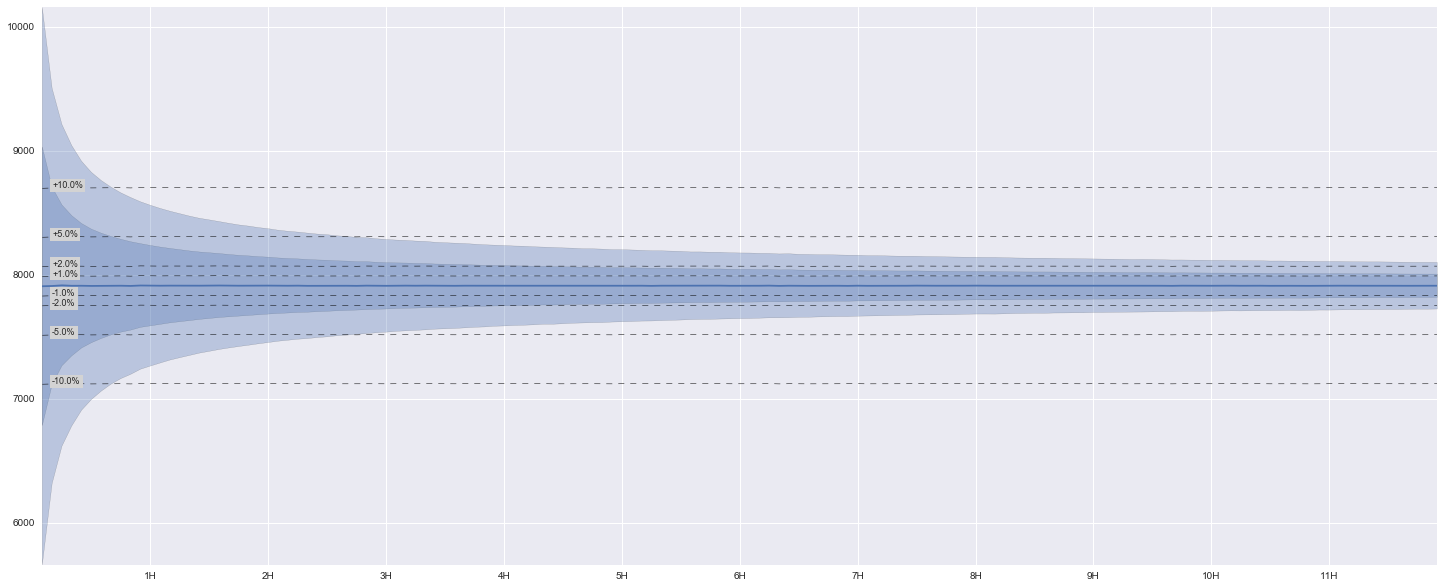

In [132]:
pl.figure(figsize=(25, 10))
# Plot means
pl.plot(windows, means)
pl.fill_between(windows, means + stds, means - stds, alpha = 0.3)
pl.fill_between(windows, means + 2 * stds, means - 2 * stds, alpha = 0.3)

# Plot 
levels = [0.01, 0.02, 0.05, 0.1]
for level in levels:
    level_line = means * (1 + level)
    pl.plot(windows, level_line, "--k", lw=0.5)
    pl.text(windows[1], level_line[1], "+%.1f%%" % (level * 100), size=9, bbox={'facecolor':'lightgrey', 'alpha':1.0, 'pad':2, 'lw':0})
    
    level_line = means * (1 - level)
    pl.plot(windows, level_line, "--k", lw=0.5)
    pl.text(windows[1], level_line[1], "-%.1f%%" % (level * 100), size=9, bbox={'facecolor':'lightgrey', 'alpha':1.0, 'pad':2, 'lw':0})
    
pl.ylim(np.min(means) - 2 * np.max(stds), np.max(means) + 2 * np.max(stds))
pl.xticks(np.arange(n_hours + 1) * 12, ["%dH" % h for h in np.arange(n_hours + 1)])
pl.xlim(windows[0], windows[-1])
pl.show()

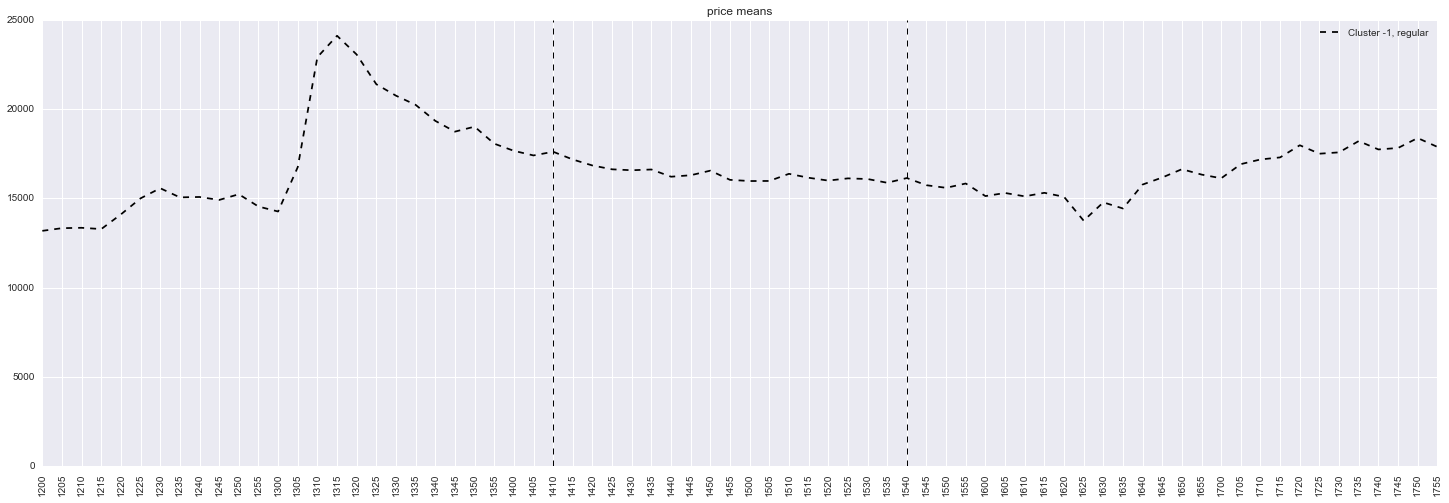

In [201]:
df_ab = pd.read_csv('/Users/anokhin/Desktop/ab.txt', sep='\t', header=None, names=['cl', 'is_test', 'time', 'money', 'n'])

times = np.sort(np.unique(df_ab['time']))
x = np.arange(len(times))
colors = ['r', 'g', 'b', 'm', 'k']
classes = np.sort(np.unique(df_ab['cl']))

pl.figure(figsize=(25, 8))
for cl in classes:
    if cl != -1:
        continue
        
    df_test = df_ab[(df_ab['cl'] == cl) & (df_ab['is_test'] == 1)].sort_values(by='time')
    df_regu = df_ab[(df_ab['cl'] == cl) & (df_ab['is_test'] == 0)].sort_values(by='time')    
        
#     pl.plot(x, df_test['money'], label="Cluster %d, test" % cl, color=colors[cl], ls="-")
    pl.plot(x, df_regu['money'], label="Cluster %d, regular" % cl, color=colors[cl], ls="--")
    
#     pl.plot(x, 1.0 * df_test['money'].values / df_regu['money'].values, label="Cluster %d" % cl, color=colors[cl], ls="-")

#     pl.plot(x, df_test['n'], label="Cluster %d, test" % cl, color=colors[cl], ls="-")
#     pl.plot(x, df_regu['n'], label="Cluster %d, regular" % cl, color=colors[cl], ls="--")

#     pl.plot(x, 1.0 * df_test['n'].values / df_regu['n'].values, label="Cluster %d" % cl, color=colors[cl], ls="-")

#     pl.plot(x, 1.0 * df_test['money'].values / df_test['n'].values, label="Cluster %d, test" % cl, color=colors[cl], ls="-")
#     pl.plot(x, 1.0 * df_regu['money'].values / df_regu['n'].values, label="Cluster %d, regular" % cl, color=colors[cl], ls="--")
    
pl.xticks(x, [t.split(":")[-1] for t in times], rotation=90)
pl.xlim(x[0], x[-1])
pl.axvline(26, lw=1, ls='--', color='k')
pl.axvline(44, lw=1, ls='--', color='k')
pl.axhline(1.0, lw=1, color='k')
pl.legend()
pl.title("price means")
    
pl.show()

In [208]:
df_means = df_ab[(df_ab['time'] > "20160218:1410") & (df_ab['time'] < "20160218:1540")][['cl', 'is_test', 'money']].groupby(['cl', 'is_test']).mean()

In [203]:
df_ab[(df_ab['time'] < "20160218:1410") | (df_ab['time'] > "20160218:1540")][['cl', 'is_test', 'money']].groupby(['cl', 'is_test']).mean()

money
cl is_test              
-1 0        16757.924528
 0 0          905.396226
   1          901.716981
 1 0         1906.943396
   1         1875.245283
 2 0         1800.867925
   1         1782.679245
 3 0          837.509434
   1          848.396226

In [199]:
2981./3068

0.9716427640156454